In [1]:
!pip install pandas

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

In [3]:
census = pd.read_csv('acs2017_census_tract_data.csv',encoding='latin-1')

In [4]:
census.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [5]:
#https://www.huduser.gov/portal/datasets/usps_crosswalk.html#data
county_zip = pd.read_csv('ZIP_TRACT_122017.csv')

In [6]:
county_zip_2 = county_zip.sort_values('tract').reset_index(drop=True)

In [7]:
county_zip_2.head()

,zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,36067,1001020100,0.062759,0.030519,0.057471,0.060419
1,36008,1001020200,1.000000,1.000000,0.000000,1.000000
2,36067,1001020200,0.072697,0.309257,0.206897,0.091059
3,36067,1001020300,0.111668,0.109868,0.264368,0.113447
4,36067,1001020400,0.003678,0.093591,0.022989,0.010261


In [11]:
df_combined_1 = pd.merge(census, county_zip_2, left_on='TractId', right_on='tract').drop('tract',1)

In [12]:
df_combined_1.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,zip,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,36067,0.062759,0.030519,0.057471,0.060419
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,36008,1.000000,1.000000,0.000000,1.000000
2,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,36067,0.072697,0.309257,0.206897,0.091059
3,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,36067,0.111668,0.109868,0.264368,0.113447
4,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,36067,0.003678,0.093591,0.022989,0.010261


In [13]:
df_combined_1['Men'] = df_combined_1['Men']/df_combined_1['TotalPop']*100.0
df_combined_1['Women'] = df_combined_1['Women']/df_combined_1['TotalPop']*100.0

In [14]:
df_combined_1 = df_combined_1.rename(columns={
                                            'Men':'Percentage:Men',
                                            'Women':'Percentage:Women',
                                            'ZIP CODE SHORT 2':'ZIP CODE',
                                            'Hispanic':'Race:Hispanic',
                                            'White':'Race:White',
                                            'Black':'Race:Black',
                                            'Native':'Race:Native',
                                            'Asian':'Race:Asian',
                                            'Pacific':'Race:Pacific',
                                            'Professional':'Occupation:Professional',
                                            'Service':'Occupation:Service',
                                            'Office':'Occupation:Office',
                                            'Construction':'Occupation:Construction',
                                            'Production':'Occupation:Production',
                                            'Drive':'Commute:Drive',
                                            'Carpool':'Commute:Carpool',
                                            'Transit':'Commute:Transit',
                                            'Walk':'Commute:Walk',
                                            'OtherTransp':'Commute:OtherTransp',
                                            'WorkAtHome':'Commute:WorkAtHome',
                                            'PrivateWork':'Employment:PrivateWork',
                                            'PublicWork':'Employment:PublicWork',
                                            'SelfEmployed':'Employment:SelfEmployed',
                                            'FamilyWork':'Employment:FamilyWork',
                                            'Unemployment': 'Employment:Unemployment'})

In [15]:
zip_lat_lng_conv = pd.read_csv('ZIP,LAT,LNG.csv')
zip_lat_lng_conv['zip_code'] = zip_lat_lng_conv['zip_code'].map(lambda x: str(x)[1:-1])
zip_lat_lng_conv['zip_code'] = zip_lat_lng_conv['zip_code'].astype(int)

In [35]:
zip_lat_lng_conv.head()

,zip_code,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158327,-66.932928
4,610,18.295366,-67.125135


In [16]:
zip_lat_lng_conv.head()

df_combined_2 = pd.merge(df_combined_1, zip_lat_lng_conv, left_on='zip', right_on='zip_code').drop('zip_code',1)

In [17]:
df_combined_2.head()

,TractId,State,County,TotalPop,Percentage:Men,Percentage:Women,Race:Hispanic,Race:White,Race:Black,Race:Native,Race:Asian,Race:Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Occupation:Professional,Occupation:Service,Occupation:Office,Occupation:Construction,Occupation:Production,Commute:Drive,Commute:Carpool,Commute:Transit,Commute:Walk,Commute:OtherTransp,Commute:WorkAtHome,MeanCommute,Employed,Employment:PrivateWork,Employment:PublicWork,Employment:SelfEmployed,Employment:FamilyWork,Employment:Unemployment,zip,res_ratio,bus_ratio,oth_ratio,tot_ratio,LAT,LNG
0,1001020100,Alabama,Autauga County,1845,48.726287,51.273713,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,36067,0.062759,0.030519,0.057471,0.060419,32.516518,-86.561483
1,1001020200,Alabama,Autauga County,2172,53.729282,46.270718,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,36067,0.072697,0.309257,0.206897,0.091059,32.516518,-86.561483
2,1001020300,Alabama,Autauga County,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,36067,0.111668,0.109868,0.264368,0.113447,32.516518,-86.561483
3,1001020400,Alabama,Autauga County,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,36067,0.003678,0.093591,0.022989,0.010261,32.516518,-86.561483
4,1001020500,Alabama,Autauga County,9965,50.717511,49.282489,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,36067,0.000391,0.016277,0.000000,0.001507,32.516518,-86.561483


In [18]:
df_combined_3 = df_combined_2[['State', 'TotalPop', 'Income','Poverty','zip', 'LAT', 'LNG',
'Race:Hispanic','Race:White','Race:Black','Race:Native','Race:Asian','Race:Pacific',
'IncomePerCap','Poverty','ChildPoverty',
'Occupation:Professional','Occupation:Service','Occupation:Office','Occupation:Construction','Occupation:Production','Commute:Drive',
'Commute:Carpool','Commute:Transit','Commute:Walk','Commute:OtherTransp','Commute:WorkAtHome','MeanCommute',
'Employed','Employment:PrivateWork','Employment:PublicWork','Employment:SelfEmployed','Employment:FamilyWork','Employment:Unemployment',
'res_ratio','bus_ratio','oth_ratio','tot_ratio']]


In [19]:
df_combined_3['gdp_zip'] = df_combined_3['Income']*df_combined_3['TotalPop']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
total_pop_df = df_combined_3.groupby('zip').sum()[['TotalPop','gdp_zip']].reset_index()

In [21]:
total_pop_df['Income'] = total_pop_df['gdp_zip']/total_pop_df['TotalPop']

In [22]:
total_pop_df_2 = total_pop_df[['zip','TotalPop','Income']]
total_pop_df_2.head()

,zip,TotalPop,Income
0,601,6033,11972.889110
1,602,15709,18606.411802
2,603,49384,17179.865523
3,606,12191,16870.862686
4,610,16930,19944.277673


In [23]:
state_zipcode = df_combined_3[['State','zip']].drop_duplicates().reset_index(drop=True)
state_zipcode.head()

,State,zip
0,Alabama,36067
1,Alabama,36066
2,Alabama,36022
3,Alabama,36051
4,Alabama,36091


In [24]:
total_pop_df_3 = pd.merge(total_pop_df_2, state_zipcode, left_on='zip', right_on='zip')
total_pop_df_3.head()

,zip,TotalPop,Income,State
0,601,6033,11972.889110,Puerto Rico
1,602,15709,18606.411802,Puerto Rico
2,603,49384,17179.865523,Puerto Rico
3,606,12191,16870.862686,Puerto Rico
4,610,16930,19944.277673,Puerto Rico


In [26]:
electricity_prices = pd.read_csv('Electricity_Price.csv')
housing_prices = pd.read_csv('Housing_Price')
zcta_areas_conv = pd.read_csv('ZCTA Areas.csv')

In [27]:
electricity_prices.columns = electricity_prices.iloc[0]
electricity_prices = electricity_prices.iloc[1:].rename_axis(None, axis=1)
electricity_prices = electricity_prices[['State', 'Avg_Price']].reset_index(drop=True)
electricity_prices.head()

,State,Avg_Price
0,Connecticut,17.55
1,Maine,13.02
2,Massachusetts,17.12
3,New Hampshire,16.17
4,Rhode Island,16.42


In [28]:
housing_prices.head()

,RegionName,CountyName,average_price
0,10025,New York County,1.027553e+06
1,60657,Cook County,4.113250e+05
2,10023,New York County,1.934361e+06
3,77494,Harris County,3.382984e+05
4,60614,Cook County,5.619842e+05


In [29]:
zcta_areas_conv = zcta_areas_conv[['GEOID', 'ALAND_SQMI']]
zcta_areas_conv.head()

,GEOID,ALAND_SQMI
0,601,64.348
1,602,30.613
2,603,31.616
3,606,42.309
4,610,35.916


In [34]:
weather = pd.read_csv('Weather.csv')
weather.columns = weather.iloc[0]
weather = weather.iloc[1:].rename_axis(None, axis=1)
weather = weather[['State','Avg_Temp','Avg_Precp','Sun_Percentage','Humidity']]
weather.head()

,State,Avg_Temp,Avg_Precp,Sun_Percentage,Humidity
1,Alabama,62.8,58.3,58,84
2,Alaska,26.6,22.5,41,77
3,Arizona,60.3,13.6,85,53
4,Arkansas,60.4,50.6,61,85
5,California,59.4,22.2,68,76


In [36]:
zip_lat_lng_conv.head()

,zip_code,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158327,-66.932928
4,610,18.295366,-67.125135


In [38]:
total_pop_df_4 = pd.merge(total_pop_df_3, electricity_prices, left_on='State', right_on='State')
total_pop_df_4 = pd.merge(total_pop_df_4, housing_prices, left_on='zip', right_on='RegionName')
total_pop_df_4 = pd.merge(total_pop_df_4, zcta_areas_conv, left_on='zip', right_on='GEOID')
total_pop_df_4 = pd.merge(total_pop_df_4, weather, left_on='State', right_on='State')
total_pop_df_4 = pd.merge(total_pop_df_4, zip_lat_lng_conv, left_on='zip', right_on='zip_code')

total_pop_df_4.head()

,zip,TotalPop,Income,State,Avg_Price,RegionName,CountyName,average_price,GEOID,ALAND_SQMI,Avg_Temp,Avg_Precp,Sun_Percentage,Humidity,zip_code,LAT,LNG
0,1001,25444,60716.004323,Massachusetts,17.12,1001,Hampden County,195856.924107,1001,11.442,47.9,47.7,58,75,1001,42.062368,-72.625754
1,1002,45925,42039.174480,Massachusetts,17.12,1002,Hampshire County,331203.245536,1002,55.043,47.9,47.7,58,75,1002,42.364031,-72.458759
2,1007,16183,92075.851696,Massachusetts,17.12,1007,Hampshire County,271758.040179,1007,52.643,47.9,47.7,58,75,1007,42.279010,-72.400468
3,1013,46836,45604.352101,Massachusetts,17.12,1013,Hampden County,161141.285714,1013,5.624,47.9,47.7,58,75,1013,42.154903,-72.602804
4,1020,54749,52258.478748,Massachusetts,17.12,1020,Hampden County,172368.245536,1020,12.470,47.9,47.7,58,75,1020,42.172611,-72.561920


In [46]:
total_pop_df_4['Avg_Price'] = total_pop_df_4['Avg_Price'].apply(pd.to_numeric)

In [49]:
total_pop_df_4['IncomeperCap'] = total_pop_df_4['Income']/total_pop_df_4['TotalPop']

In [52]:
total_pop_df_4 = total_pop_df_4.drop('IncomeperCap',1)

# inputting places where solar projects are built

In [39]:
EIA_solar_df = pd.read_csv('openpv_all.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,5,8,12,13,14,15,16,20,23,25,26,27,28,32,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
EIA_solar_df_2 = EIA_solar_df[['size_kw','zipcode','cost_per_watt']]

In [41]:
EIA_solar_df_3 = EIA_solar_df_2.dropna(how='any')

In [42]:
EIA_solar_df_3.head()

,size_kw,zipcode,cost_per_watt
0,10.560,78702.0,2.897777
1,12.720,78702.0,3.144654
2,5.400,78702.0,4.197330
3,6.785,47403.0,2.590000
4,4.720,47408.0,2.570000


In [43]:
total_kw_zipcode = EIA_solar_df_3.groupby('zipcode')['size_kw'].sum().reset_index()
average_cost_per_watt_zipcode = EIA_solar_df_3.groupby('zipcode')['cost_per_watt'].mean().reset_index()

In [53]:
#Here, we get where projects are currently being built, so any geographic merges should be done above

df_combined_5 = pd.merge(total_pop_df_4, average_cost_per_watt_zipcode, left_on='zip', right_on='zipcode').drop('zipcode',1)

df_combined_6 = pd.merge(df_combined_5, total_kw_zipcode, left_on='zip', right_on='zipcode').drop('zipcode',1)


In [54]:
df_combined_6.head()

,zip,TotalPop,Income,State,Avg_Price,RegionName,CountyName,average_price,GEOID,ALAND_SQMI,Avg_Temp,Avg_Precp,Sun_Percentage,Humidity,zip_code,LAT,LNG,cost_per_watt,size_kw
0,1001,25444,60716.004323,Massachusetts,17.12,1001,Hampden County,195856.924107,1001,11.442,47.9,47.7,58,75,1001,42.062368,-72.625754,4.812249,4616.337
1,1002,45925,42039.174480,Massachusetts,17.12,1002,Hampshire County,331203.245536,1002,55.043,47.9,47.7,58,75,1002,42.364031,-72.458759,5.551281,4723.537
2,1007,16183,92075.851696,Massachusetts,17.12,1007,Hampshire County,271758.040179,1007,52.643,47.9,47.7,58,75,1007,42.279010,-72.400468,4.903319,4373.798
3,1013,46836,45604.352101,Massachusetts,17.12,1013,Hampden County,161141.285714,1013,5.624,47.9,47.7,58,75,1013,42.154903,-72.602804,4.883375,74.480
4,1020,54749,52258.478748,Massachusetts,17.12,1020,Hampden County,172368.245536,1020,12.470,47.9,47.7,58,75,1020,42.172611,-72.561920,3.820147,9559.610


In [143]:
df_combined_6.to_csv('full_dataframe_solsearch.csv')

# Preparing data for testing

In [56]:
X = df_combined_6[['TotalPop','Income','Avg_Price','average_price','ALAND_SQMI','Avg_Temp','Avg_Precp','Sun_Percentage','Humidity','zip_code','LAT','LNG',]]
y = df_combined_6['size_kw']/(df_combined_6['TotalPop']/df_combined_6['ALAND_SQMI'])

In [148]:
X.sample(n=10)

,TotalPop,Income,Avg_Price,average_price,ALAND_SQMI,Avg_Temp,Avg_Precp,Sun_Percentage,Humidity,zip_code,LAT,LNG
3297,54315,64768.349167,8.38,151741.540179,6.084,64.8,28.9,61,82,75137,32.643212,-96.916468
4497,55870,59994.680079,16.06,313394.482143,8.649,59.4,22.2,68,76,91768,34.063516,-117.790379
1544,16438,49991.069838,13.32,173589.383929,6.275,43.8,47.1,56,83,8251,39.027715,-74.929514
1384,26919,107548.375200,13.32,671325.727679,10.467,43.8,47.1,56,83,7652,40.947299,-74.070169
3688,50628,85750.293296,9.99,346369.875000,16.503,45.1,15.9,71,60,80021,39.890663,-105.113724
3348,23574,50014.100322,8.38,165104.085000,323.948,64.8,28.9,61,82,75633,32.138496,-94.274156
3846,83474,71996.350109,8.60,338356.600000,9.413,48.6,12.2,66,67,84088,40.595161,-111.960919
785,75072,69289.403799,14.74,502779.231707,2.120,45.4,41.8,46,82,11209,40.621993,-74.030134
2637,23005,81891.509454,9.77,212193.022321,7.560,51.7,41.7,55,83,46321,41.546910,-87.504589
2771,77049,86542.843775,10.76,359573.024590,105.717,43.1,32.6,54,84,53066,43.112853,-88.490036


In [58]:
y.head()

0     2.075936
1     5.661353
2    14.227884
3     0.008943
4     2.177361
dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

random_grid = {
               'max_depth': range(1, 10),
               'min_samples_split': range(2,10),
               'n_estimators': range(40,80)}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 3, random_state=0, n_jobs = -1,scoring="r2")

rf_random.fit(X_train, y_train)
y_test_predictions = rf_random.predict(X_test)
print(rf_random.best_params_)

{'n_estimators': 75, 'max_depth': 3, 'min_samples_split': 6}


In [62]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = rf_random.predict(X_test)
explained_variance_score = explained_variance_score(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('explained variance = {}'.format(explained_variance_score))
print('r2 = {}'.format(r_squared))

explained variance = 0.45487959995597893
r2 = 0.4548743643257136


In [64]:
y_test.reset_index(drop=True, inplace=True)

In [125]:
concat_predictions = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, columns=['y_test', 'y_pred'])

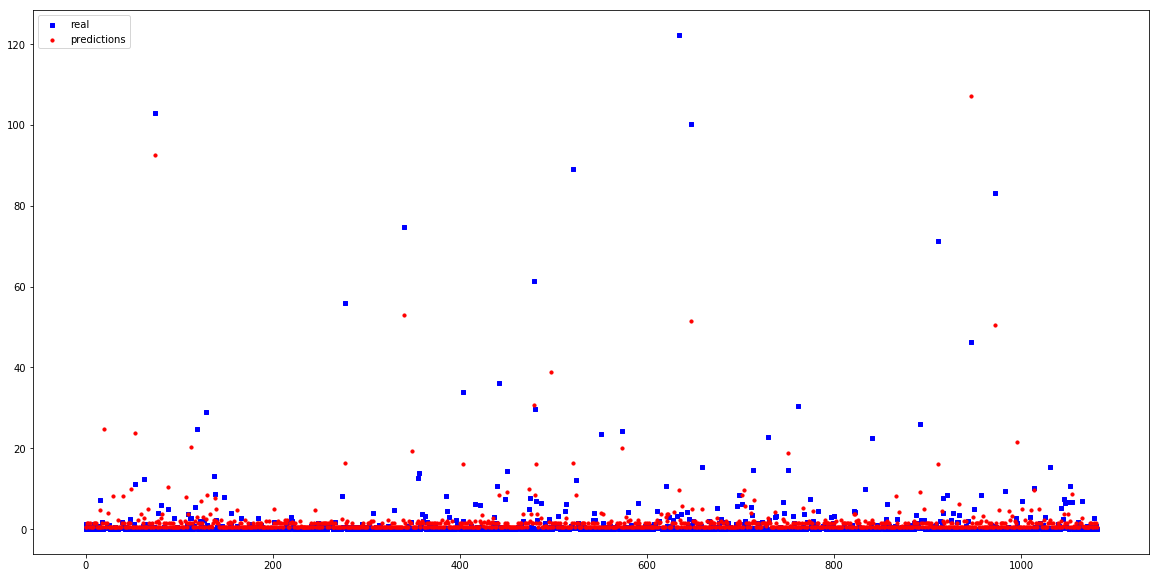

In [131]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.scatter(concat_predictions.index.values.tolist(),concat_predictions['y_test'], s=10, c='b', marker="s", label='real')
ax1.scatter(concat_predictions.index.values.tolist(), concat_predictions['y_pred'], s=10, c='r', marker="o", label='predictions')
plt.legend(loc='upper left');
# ax1.set_ylim([0,1])
plt.show()

In [73]:
X_total_all = total_pop_df_4[['TotalPop','Income','Avg_Price','average_price','ALAND_SQMI','Avg_Temp','Avg_Precp','Sun_Percentage','Humidity','zip_code','LAT','LNG']]

In [74]:
y_pred_all = rf_random.predict(X_total_all)

In [79]:
concat_predictions = pd.DataFrame({'receptivity': y_pred_all, 'LAT': X_total_all['LAT'],
                                   'LNG':X_total_all['LNG']})

In [86]:
concat_predictions = concat_predictions.sort_values('receptivity').reset_index(drop=True)

In [97]:
ranking = pd.DataFrame(data = list(range(0,len(concat_predictions))), columns =['ranking'])
concat_predictions_2 = pd.merge(concat_predictions, ranking, left_index=True,right_index=True)

In [146]:
concat_predictions_2.head(n=10)

,LAT,LNG,receptivity,ranking
0,39.960563,-85.947162,0.585477,0
1,36.149775,-86.789146,0.585477,1
2,36.106735,-86.774283,0.585477,2
3,36.113195,-86.870442,0.585477,3
4,36.179319,-86.731083,0.585477,4
5,36.233774,-86.775969,0.585477,5
6,36.177714,-86.808023,0.585477,6
7,36.149248,-86.733016,0.585477,7
8,36.067214,-86.723700,0.585477,8
9,36.133877,-86.801254,0.585477,9


In [102]:
concat_predictions_2.to_csv('ranking_receptivity_lat_lng.csv')